<a href="https://colab.research.google.com/github/Umamcode/Data-Mining-Umam/blob/Praktikum-9/praktikum_9_(kelulusan_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. View Dataset
Load pustaka program K-NN dan tampilkan dataset kredit resiko

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Semester3/Peminatan/Data_Mining/Dataset/kelulusan_test.xls')
df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


# 3. Data Preparation
Lakukan perbaikan dataset, misal data kosong diganti dengan rata-rata data.

In [ ]:
df.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [ ]:
# Mengisi nilai yang kosong pada kolom 'IPS 8' dengan Mean
mean_IPS_8 = df['IPS 8'].mean()
df['IPS 8'].fillna(mean_IPS_8, inplace=True)

In [ ]:
# Mengisi nilai yang kosong pada kolom 'IPK' dengan Mean
mean_IPK = df['IPK '].mean()
df['IPK '].fillna(mean_IPK, inplace=True)

In [ ]:
df.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [ ]:
df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.000000,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,1.932695,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.500000,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.170000,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.000000,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.500000,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.000000,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.000000,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.000000,3.16,TEPAT


# 4. Data Preprocessing
Proses data dengan menentukan variabel yang ingin diprediksi Y (dependent variable), mengambil
variabel X (independent variable) yang digunakan untuk memprediksi Y.

In [ ]:
# Data Preprocessing
X = df.drop(['STATUS KELULUSAN', 'NAMA'], axis=1) # Features atau labelnya yang mau dipake
y = df['STATUS KELULUSAN'] # Target

# Encoding data kategorikal
X = pd.get_dummies(X, columns=['IPS 8', 'STATUS MAHASISWA', 'STATUS NIKAH', 'UMUR', 'JENIS KELAMIN'])

# Split dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.000000,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,1.932695,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.500000,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.170000,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.000000,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.500000,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.000000,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.000000,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.000000,3.16,TEPAT


# 5. Training Model
Lakukan training model.

In [ ]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training Model
knn = KNeighborsClassifier(n_neighbors=5) # Jumlah tetangga (k) dapat disesuaikan
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 6. Prediksi Data
Lakukan prediksi data dan mendapatkan matrik evaluasi dengan confusion matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


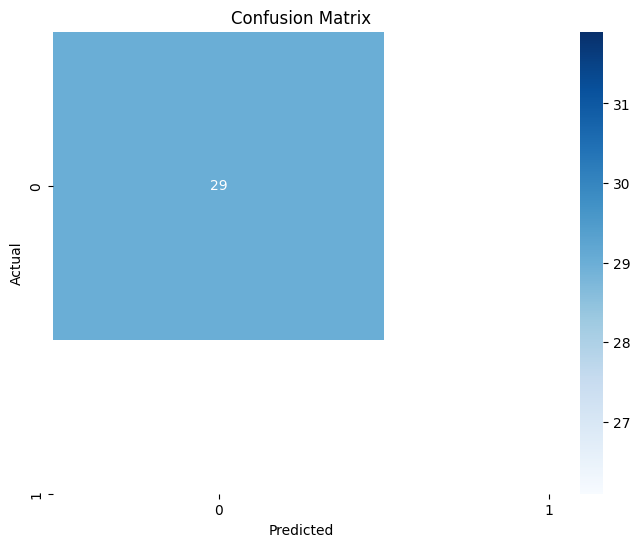

In [ ]:
# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menghitung confusion matrix atau mengevaluasi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Visualisasi Data
Visualisasi data prediksi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


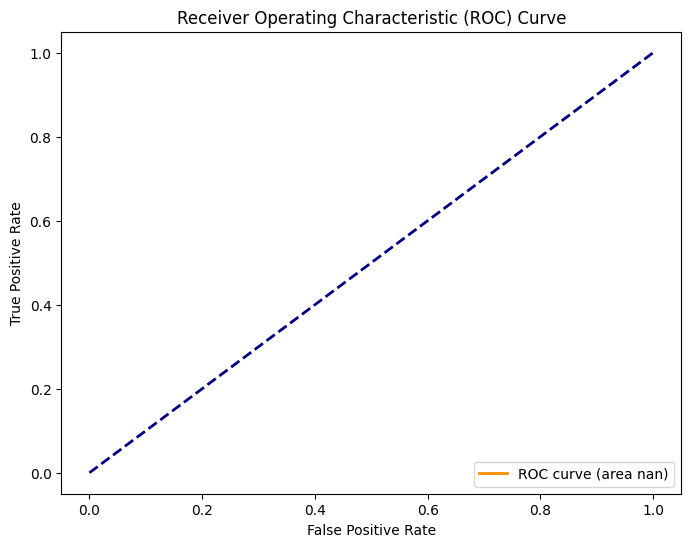

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat Label encoder dulu
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# # Ubah y_test dan y_pred jadi numerik
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 8. Evaluasi Model
Cetak hasil evaluasi model

In [ ]:
# Evaluasi Model
y_pred = knn.predict(X_test)

# Confusion Matrix dan Classification Report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[29]]

Classification Report:
               precision    recall  f1-score   support

       TEPAT       1.00      1.00      1.00        29

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
